In [11]:
import pandas as pd
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import requests
from scipy.stats import linregress
from scipy import stats
import scipy.stats as st
import pandas as pd

# Clean and preprocess the budget data, handling missing values, standardizing formats, 
# and ensuring data consistency. 
# Perform initial checks to ensure the dataset is ready for analysis.

In [12]:
#Loading the data into dataframes

In [13]:
budget_path_2019 = Path("approved-operating-budget-summary-2019.xlsx") #2019
budget2019_df = pd.read_excel(budget_path_2019, sheet_name='2019')
budget_path_2020 = Path("approved-operating-budget-summary-2020.xlsx") #2020
budget2020_df = pd.read_excel(budget_path_2020, sheet_name='open data')
budget_path_2021 = Path("approved-operating-budget-summary-2021.xlsx") #2021
budget2021_df = pd.read_excel(budget_path_2021, sheet_name='2021')
budget_path_2022 = Path("approved-operating-budget-summary-2022.xlsx") #2022
budget2022_df = pd.read_excel(budget_path_2022, sheet_name='Open Data')
budget_path_2023 = Path("approved-operating-budget-summary-2023.xlsx") #2023
budget2023_df = pd.read_excel(budget_path_2023, sheet_name='Open Data')

In [14]:
#Checking for null values using the isnull function, and printing the number of null values in the data frame

In [15]:
null_2019 = budget2019_df.isnull()   #checking for null values
null_per_column_2019 = null_2019.sum()
print(null_per_column_2019)

Program              0
Service              0
Activity             0
Expense/Revenue      0
Category Name        0
Sub-Category Name    0
Commitment item      0
2019                 0
dtype: int64


In [16]:
null_2020 = budget2020_df.isnull() #checking for null values
null_per_column_2020 = null_2020.sum()
print(null_per_column_2020)

Program              0
Service              0
Activity             0
Expense/Revenue      0
Category Name        0
Sub-Category Name    0
Commitment item      0
2020                 0
dtype: int64


In [17]:
null_2021  = budget2021_df.isnull() #checking for null values
null_per_column_2021 = null_2021.sum()
print(null_per_column_2021)

Program              0
Service              0
Activity             0
Expense/Revenue      0
Category Name        0
Sub-Category Name    0
Commitment item      0
2021                 0
dtype: int64


In [18]:
null_2022 = budget2022_df.isnull()  #checking for null values
null_per_column_2022 = null_2022.sum()
print(null_per_column_2022)

Program              0
Service              0
Activity             0
Expense/Revenue      0
Category Name        0
Sub-Category Name    0
Commitment item      0
2022                 0
dtype: int64


In [19]:
null_2023 = budget2023_df.isnull()    #checking for null values
null_per_column_2023 = null_2023.sum()
print(null_per_column_2023)

Program              0
Service              0
Activity             0
Expense/Revenue      0
Category Name        0
Sub-Category Name    0
Commitment item      0
2023                 0
dtype: int64


In [20]:
#Renaming the last column in the data set to Budgeted Amount Year

In [21]:
budget2019_df.rename(columns={2019.0: 'Budgeted amount 2019'}, inplace=True)
budget2020_df.rename(columns={2020.0: 'Budgeted amount 2020'}, inplace=True)
budget2021_df.rename(columns={2021.0: 'Budgeted amount 2021'}, inplace=True)
budget2022_df.rename(columns={2022.0: 'Budgeted amount 2022'}, inplace=True)
budget2023_df.rename(columns={2023.0: 'Budgeted amount 2023'}, inplace=True)

In [22]:
#Checking for duplicates 

In [23]:
##  Counts number of values in each dataframe before dropping duplicates

In [24]:
budget2019_df.count()

Program                 19428
Service                 19428
Activity                19428
Expense/Revenue         19428
Category Name           19428
Sub-Category Name       19428
Commitment item         19428
Budgeted amount 2019    19428
dtype: int64

In [25]:
budget2020_df.count()

Program                 17779
Service                 17779
Activity                17779
Expense/Revenue         17779
Category Name           17779
Sub-Category Name       17779
Commitment item         17779
Budgeted amount 2020    17779
dtype: int64

In [26]:
budget2021_df.count()

Program                 20816
Service                 20816
Activity                20816
Expense/Revenue         20816
Category Name           20816
Sub-Category Name       20816
Commitment item         20816
Budgeted amount 2021    20816
dtype: int64

In [27]:
budget2022_df.count()

Program                 19714
Service                 19714
Activity                19714
Expense/Revenue         19714
Category Name           19714
Sub-Category Name       19714
Commitment item         19714
Budgeted amount 2022    19714
dtype: int64

In [28]:
budget2023_df.count()

Program                 20127
Service                 20127
Activity                20127
Expense/Revenue         20127
Category Name           20127
Sub-Category Name       20127
Commitment item         20127
Budgeted amount 2023    20127
dtype: int64

In [29]:
##Dropping duplicates
budget2019_df.drop_duplicates(subset = 'Budgeted amount 2019')
budget2020_df.drop_duplicates(subset = 'Budgeted amount 2020')
budget2021_df.drop_duplicates(subset = 'Budgeted amount 2021')
budget2022_df.drop_duplicates(subset = 'Budgeted amount 2022')
budget2023_df.drop_duplicates(subset = 'Budgeted amount 2023')

,Program,Service,Activity,Expense/Revenue,Category Name,Sub-Category Name,Commitment item,Budgeted amount 2023
0,311 Toronto,311 Development,311 PMO,Expenses,Benefits,Benefits,Canada Pension Plan,63293.40
1,311 Toronto,311 Development,311 PMO,Expenses,Service And Rent,Telecommnuncation,Cellular Telephones,2830.00
2,311 Toronto,311 Development,311 PMO,Expenses,Benefits,Benefits,Comprehensive Medical,72595.32
3,311 Toronto,311 Development,311 PMO,Expenses,Benefits,Benefits,Dental Plan,37800.96
4,311 Toronto,311 Development,311 PMO,Expenses,Benefits,Benefits,Employment Insurance,22992.96
...,...,...,...,...,...,...,...,...
20114,Yonge-Dundas Square,Public Square And Event Venue,Not assigned,Expenses,Service And Rent,Services,Other Expenses,714500.00
20115,Yonge-Dundas Square,Public Square And Event Venue,Not assigned,Expenses,Service And Rent,Services,Other Professional And Technical Service,66000.00
20123,Yonge-Dundas Square,Public Square And Event Venue,Not assigned,Revenues,Contribution From Reserves/Reserve Funds,Contribution From Reserves/Reserve Funds,Contributions From Reserves,-33519.00
20124,Yonge-Dundas Square,Public Square And Event Venue,Not assigned,Revenues,User Fees & Donations,User Fees,"Fees, Service Charges",-836250.00


In [30]:
##Checking if count values changed after dropping duplicates

In [31]:
budget2019_df.count()

Program                 19428
Service                 19428
Activity                19428
Expense/Revenue         19428
Category Name           19428
Sub-Category Name       19428
Commitment item         19428
Budgeted amount 2019    19428
dtype: int64

In [32]:
budget2020_df.count()

Program                 17779
Service                 17779
Activity                17779
Expense/Revenue         17779
Category Name           17779
Sub-Category Name       17779
Commitment item         17779
Budgeted amount 2020    17779
dtype: int64

In [33]:
budget2021_df.count()

Program                 20816
Service                 20816
Activity                20816
Expense/Revenue         20816
Category Name           20816
Sub-Category Name       20816
Commitment item         20816
Budgeted amount 2021    20816
dtype: int64

In [34]:
budget2022_df.count()

Program                 19714
Service                 19714
Activity                19714
Expense/Revenue         19714
Category Name           19714
Sub-Category Name       19714
Commitment item         19714
Budgeted amount 2022    19714
dtype: int64

In [35]:
budget2023_df.count()

Program                 20127
Service                 20127
Activity                20127
Expense/Revenue         20127
Category Name           20127
Sub-Category Name       20127
Commitment item         20127
Budgeted amount 2023    20127
dtype: int64

In [36]:
#Checking if data types are consistent in the datasets

In [37]:
budget2019_df.dtypes

Program                  object
Service                  object
Activity                 object
Expense/Revenue          object
Category Name            object
Sub-Category Name        object
Commitment item          object
Budgeted amount 2019    float64
dtype: object

In [38]:
budget2020_df.dtypes

Program                  object
Service                  object
Activity                 object
Expense/Revenue          object
Category Name            object
Sub-Category Name        object
Commitment item          object
Budgeted amount 2020    float64
dtype: object

In [39]:
budget2021_df.dtypes

Program                  object
Service                  object
Activity                 object
Expense/Revenue          object
Category Name            object
Sub-Category Name        object
Commitment item          object
Budgeted amount 2021    float64
dtype: object

In [40]:
budget2022_df.dtypes

Program                  object
Service                  object
Activity                 object
Expense/Revenue          object
Category Name            object
Sub-Category Name        object
Commitment item          object
Budgeted amount 2022    float64
dtype: object

In [41]:
budget2023_df.dtypes

Program                  object
Service                  object
Activity                 object
Expense/Revenue          object
Category Name            object
Sub-Category Name        object
Commitment item          object
Budgeted amount 2023    float64
dtype: object

In [42]:
#Seperating the data into different dataframes based on if they are expense or revenue

In [43]:
budget2019_df_exp = budget2019_df[budget2019_df['Expense/Revenue']=='Expenses']
budget2019_df_rev = budget2019_df[budget2019_df['Expense/Revenue']=='Revenues']
budget2019_df_exp.to_excel('expense_2019.xlsx', index=False)
budget2019_df_exp.sample(2)

,Program,Service,Activity,Expense/Revenue,Category Name,Sub-Category Name,Commitment item,Budgeted amount 2019
14864,Toronto Public Health,Chronic Diseases & Injuries,Chronic Diseases & Injuries,Expenses,Service And Rent,Business Travel,Bus Trav - Other Exp,44.57
5957,Engineering & Construction Services,Engineering Information,Land Information,Expenses,Salaries And Benefits,Disability,"WSIB, Med & Pen",3032.64


In [44]:
budget2020_df_exp = budget2020_df[budget2020_df['Expense/Revenue']=='Expenses']
budget2020_df_rev = budget2020_df[budget2020_df['Expense/Revenue']=='Revenues']
#budget2020_df_exp.to_excel('expense_2020.xlsx', index=False)

In [45]:
budget2021_df_exp = budget2021_df[budget2021_df['Expense/Revenue']=='Expenses']
budget2021_df_rev = budget2021_df[budget2021_df['Expense/Revenue']=='Revenues']
#budget2021_df_exp.to_excel('expense_2021.xlsx', index=False)

In [46]:
budget2022_df_exp = budget2022_df[budget2022_df['Expense/Revenue']=='Expenses']
budget2022_df_rev = budget2022_df[budget2022_df['Expense/Revenue']=='Revenues']
#budget2022_df_exp.to_excel('expense_2022.xlsx', index=False)

In [112]:
budget2023_df_exp = budget2023_df[budget2023_df['Expense/Revenue']=='Expenses']
budget2023_df_rev = budget2023_df[budget2023_df['Expense/Revenue']=='Revenues']
#budget2023_df_exp.to_excel('expense_2023.xlsx', index=False)

In [113]:
# Group by "Category Name" and sum the "Budgeted amount 2019" for each category
category_df_2019_ak = budget2019_df_exp.groupby("Category Name")["Budgeted amount 2019"].sum().reset_index()

# Rename the columns in the new DataFrame
category_df_2019_ak = category_df_2019_ak.rename(columns={"Category Name": "Category Name", "Budgeted amount 2019": "Budget Data 2019"})


#Repeating the above steps for year 2020,2021,2022,2023
category_df_2020_ak = budget2020_df_exp.groupby("Category Name")["Budgeted amount 2020"].sum().reset_index()
category_df_2020_ak = category_df_2020_ak.rename(columns={"Category Name": "Category Name", "Budgeted amount 2020": "Budget Data 2020"})


category_df_2021_ak = budget2021_df_exp.groupby("Category Name")["Budgeted amount 2021"].sum().reset_index()
category_df_2021_ak = category_df_2021_ak.rename(columns={"Category Name": "Category Name", "Budgeted amount 2021": "Budget Data 2021"})


category_df_2022_ak = budget2022_df_exp.groupby("Category Name")["Budgeted amount 2022"].sum().reset_index()
category_df_2022_ak = category_df_2022_ak.rename(columns={"Category Name": "Category Name", "Budgeted amount 2022": "Budget Data 2022"})

category_df_2023_ak = budget2023_df_exp.groupby("Category Name")["Budgeted amount 2023"].sum().reset_index()
category_df_2023_ak = category_df_2023_ak.rename(columns={"Category Name": "Category Name", "Budgeted amount 2023": "Budget Data 2023"})


In [114]:
# Merge category_df_2019_ak and category_df_2020_ak on "Category Name"
merged_df_ak = pd.merge(category_df_2019_ak, category_df_2020_ak, on="Category Name", how="outer")

# Merge the result with category_df_2021 on "Category Name"
merged_df_ak = pd.merge(merged_df_ak, category_df_2021_ak, on="Category Name", how="outer")

# Merge the result with category_df_2022 on "Category Name"
merged_df_ak = pd.merge(merged_df_ak, category_df_2022_ak, on="Category Name", how="outer")

# Merge the result with category_df_2023 on "Category Name"
merged_df_ak = pd.merge(merged_df_ak, category_df_2023_ak, on="Category Name", how="outer")

merged_df_ak

,Category Name,Budget Data 2019,Budget Data 2020,Budget Data 2021,Budget Data 2022,Budget Data 2023
0,Contribution To Capital,3.434535e+08,3.434555e+08,3.495350e+08,3.477590e+08,3.454875e+08
1,Contribution To Reserves/Reserve Funds,1.374326e+09,1.492208e+09,1.569495e+09,6.790572e+08,8.177363e+08
2,Equipment,6.256912e+07,6.305564e+07,6.305676e+07,6.962870e+07,7.491960e+07
3,Inter-Divisional Charges,3.161485e+08,1.569948e+08,NaN,3.124781e+08,3.197343e+08
4,Materials & Supplies,7.350229e+08,7.344638e+08,8.132793e+08,8.103749e+08,8.393636e+08
5,Other Expenditures,2.711142e+09,2.611534e+09,2.835059e+09,2.776243e+09,3.063181e+09
6,Salaries And Benefits,5.928046e+09,6.092481e+09,NaN,NaN,NaN
7,Service And Rent,2.082853e+09,2.178262e+09,2.342040e+09,2.632925e+09,3.071138e+09
8,Benefits,NaN,NaN,1.450706e+09,1.488014e+09,1.586110e+09
9,Salaries,NaN,NaN,4.781880e+09,5.108580e+09,5.313474e+09


In [115]:
# Define a function to divide numbers by 10^6 and round to 3 decimal places
divide_and_round_ak = lambda x: round(float(x) / 1e6, 3) if pd.to_numeric(x, errors='coerce') == x else str(x)

# Apply the division and rounding function to all columns in the DataFrame
merged_df_ak_final = merged_df_ak.applymap(divide_and_round_ak)

# Display the DataFrame after division and rounding
merged_df_ak_final

merged_df_ak_final["Category Name"]

0                   Contribution To Capital
1    Contribution To Reserves/Reserve Funds
2                                 Equipment
3                  Inter-Divisional Charges
4                      Materials & Supplies
5                        Other Expenditures
6                     Salaries And Benefits
7                          Service And Rent
8                                  Benefits
9                                  Salaries
Name: Category Name, dtype: object

In [116]:
# Replace 'nan' strings with actual NaN values
merged_df_ak_final.replace('nan', pd.NA, inplace=True)

# Replace NaN values with 0
merged_df_ak_final.fillna(0, inplace=True)
merged_df_ak_final

# Filter rows for "Salaries" and "Benefits" from the year 2021
salaries_2021 = merged_df_ak_final.loc[merged_df_ak_final['Category Name'].isin(['Salaries', 'Benefits']), 'Budget Data 2021'].sum()
salaries_2022 = merged_df_ak_final.loc[merged_df_ak_final['Category Name'].isin(['Salaries', 'Benefits']), 'Budget Data 2022'].sum()
salaries_2023 = merged_df_ak_final.loc[merged_df_ak_final['Category Name'].isin(['Salaries', 'Benefits']), 'Budget Data 2023'].sum()

# Update the "Salaries And Benefits" column for the year 2021
merged_df_ak_final.loc[merged_df_ak_final['Category Name'] == 'Salaries And Benefits', 'Budget Data 2021'] = salaries_2021
merged_df_ak_final.loc[merged_df_ak_final['Category Name'] == 'Salaries And Benefits', 'Budget Data 2022'] = salaries_2022
merged_df_ak_final.loc[merged_df_ak_final['Category Name'] == 'Salaries And Benefits', 'Budget Data 2023'] = salaries_2023
merged_df_ak_final

,Category Name,Budget Data 2019,Budget Data 2020,Budget Data 2021,Budget Data 2022,Budget Data 2023
0,Contribution To Capital,343.454,343.456,349.535,347.759,345.487
1,Contribution To Reserves/Reserve Funds,1374.326,1492.208,1569.495,679.057,817.736
2,Equipment,62.569,63.056,63.057,69.629,74.920
3,Inter-Divisional Charges,316.149,156.995,0.000,312.478,319.734
4,Materials & Supplies,735.023,734.464,813.279,810.375,839.364
5,Other Expenditures,2711.142,2611.534,2835.059,2776.243,3063.181
6,Salaries And Benefits,5928.046,6092.481,6232.586,6596.594,6899.584
7,Service And Rent,2082.853,2178.262,2342.040,2632.925,3071.138
8,Benefits,0.000,0.000,1450.706,1488.014,1586.110
9,Salaries,0.000,0.000,4781.880,5108.580,5313.474


In [117]:
merged_df_ak_final=merged_df_ak_final.drop([8,9])

In [118]:
merged_df_ak_final.set_index("Category Name")

,Budget Data 2019,Budget Data 2020,Budget Data 2021,Budget Data 2022,Budget Data 2023
Category Name,,,,,
Contribution To Capital,343.454,343.456,349.535,347.759,345.487
Contribution To Reserves/Reserve Funds,1374.326,1492.208,1569.495,679.057,817.736
Equipment,62.569,63.056,63.057,69.629,74.920
Inter-Divisional Charges,316.149,156.995,0.000,312.478,319.734
Materials & Supplies,735.023,734.464,813.279,810.375,839.364
Other Expenditures,2711.142,2611.534,2835.059,2776.243,3063.181
Salaries And Benefits,5928.046,6092.481,6232.586,6596.594,6899.584
Service And Rent,2082.853,2178.262,2342.040,2632.925,3071.138


In [192]:
# Assuming merged_df_ak_final is your DataFrame
years = ["2019", "2020", "2021", "2022", "2023"]

for year in years:
    column_name = f"Budget Data {year}"
    merged_df_ak_final[column_name] = pd.to_numeric(merged_df_ak_final[column_name], errors='coerce')

total_2019_ak = merged_df_ak_final["Budget Data 2019"].sum()
total_2020_ak = merged_df_ak_final["Budget Data 2020"].sum()
total_2021_ak = merged_df_ak_final["Budget Data 2021"].sum()
total_2022_ak = merged_df_ak_final["Budget Data 2022"].sum()
total_2023_ak = merged_df_ak_final["Budget Data 2023"].sum()

# Create a DataFrame with the totals
total_df_ak = pd.DataFrame([
    {"Year": "2019", "Total": total_2019_ak},
    {"Year": "2020", "Total": total_2020_ak},
    {"Year": "2021", "Total": total_2021_ak},
    {"Year": "2022", "Total": total_2022_ak},
    {"Year": "2023", "Total": total_2023_ak}
])
total_df_ak=total_df_ak.set_index("Year")
q = total_df_ak.loc["2021", "Total"]
q.dtype

dtype('float64')

Text(0, 0.5, 'Total Budget(in millions)')

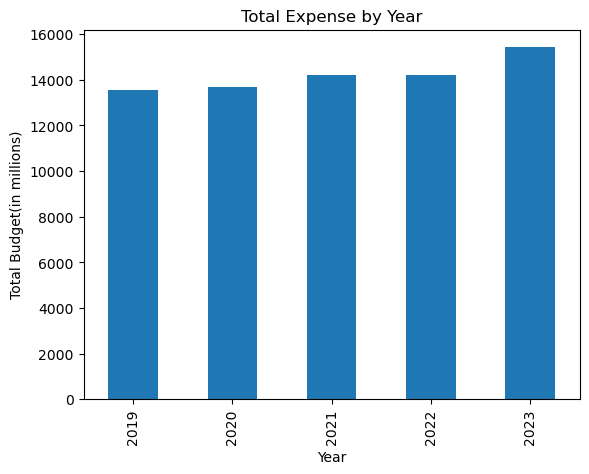

In [120]:
# Create a bar plot
graph1_ak = total_df_ak.plot(x="Year", y="Total", kind="bar", legend=False)

# Set plot title and labels
plt.title("Total Expense by Year")
plt.xlabel("Year")
plt.ylabel("Total Budget(in millions)")

In [148]:
percent_df = pd.DataFrame()
percent_df["Category Name"] = merged_df_ak_final["Category Name"]

# Display the new DataFrame
print(percent_df)

                            Category Name
0                 Contribution To Capital
1  Contribution To Reserves/Reserve Funds
2                               Equipment
3                Inter-Divisional Charges
4                    Materials & Supplies
5                      Other Expenditures
6                   Salaries And Benefits
7                        Service And Rent


In [198]:
years = ["2019", "2020", "2021", "2022", "2023"]
# Add columns for each year
for year in years:
    percent_df[f"{year}"] = round((merged_df_ak_final[f"Budget Data {year}"]/total_df_ak.loc[year, "Total"])*100,2)

# Display the new DataFrame
percent_df

,Category Name,2019,2020,2021,2022,2023
0,Contribution To Capital,2.53,2.51,2.46,2.44,2.24
1,Contribution To Reserves/Reserve Funds,10.14,10.91,11.05,4.77,5.30
2,Equipment,0.46,0.46,0.44,0.49,0.49
3,Inter-Divisional Charges,2.33,1.15,0.00,2.20,2.07
4,Materials & Supplies,5.42,5.37,5.73,5.70,5.44
5,Other Expenditures,20.00,19.10,19.96,19.52,19.85
6,Salaries And Benefits,43.74,44.56,43.88,46.37,44.71
7,Service And Rent,15.37,15.93,16.49,18.51,19.90
